# Dogs vs Cats

## Kaggle Dataset의 일부를 이용한 개, 고양이 구분

In [1]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [3]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
path = 'dogs_cats/train_1/'

In [5]:
path_t = 'dogs_cats/test_1/'

In [6]:
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

dogs_t, cats_t = [], []
y_dogs_t, y_cats_t = [], []

In [7]:
dog_path = os.path.join(path, 'dog.*')
len(glob(dog_path))

5000

In [8]:
dog_path_t = os.path.join(path_t, 'dog.*')
len(glob(dog_path_t))

1250

In [9]:
dog_path = os.path.join(path, 'dog.*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [10]:
cat_path = os.path.join(path, 'cat.*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [11]:
dog_path_t = os.path.join(path_t, 'dog.*')
for dog_img in glob(dog_path_t):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs_t.append(dog)

In [12]:
cat_path_t = os.path.join(path_t, 'cat.*')
for dog_img in glob(dog_path_t):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    cats_t.append(dog)

In [13]:
classes = ['dog', 'cat']

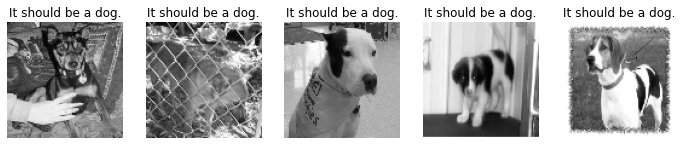

In [14]:
plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

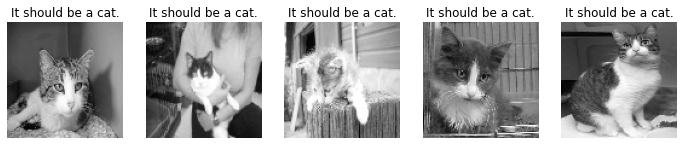

In [15]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [16]:
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [17]:
y_dogs_t = [1 for item in enumerate(dogs_t)]
y_cats_t = [0 for item in enumerate(cats_t)]

In [18]:
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [19]:
dogs_t = np.asarray(dogs_t).astype('float32') / 255
cats_t = np.asarray(cats_t).astype('float32') / 255
y_dogs_t = np.asarray(y_dogs_t).astype('int32')
y_cats_t = np.asarray(y_cats_t).astype('int32')

In [20]:
X_train = np.concatenate((dogs,cats), axis=0)
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [21]:
X_test = np.concatenate((dogs_t,cats_t), axis=0)
y_test = np.concatenate((y_dogs_t, y_cats_t), axis=0)

In [22]:
# len(X)

In [23]:
y_train = tf.keras.utils.to_categorical(y_train, 2)

In [24]:
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [25]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Activation, BatchNormalization

In [26]:
weight_decay = 1e-6

In [27]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)       

In [28]:
# opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [29]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [30]:
modelpath = "model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [31]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     )
# datagen.fit(X_train)

In [32]:
X_train.shape, y_train.shape

((10000, 96, 96, 1), (10000, 2))

In [33]:
# model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
#                     epochs=10,
#                     validation_data=(X_test, y_test),
#                     callbacks=[early_stopping_callback, checkpointer])

In [34]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2,
          callbacks=[checkpointer, early_stopping_callback])

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 142s 18ms/step - loss: 0.6944 - accuracy: 0.6226 - val_loss: 0.9205 - val_accuracy: 0.1940

Epoch 00001: val_loss improved from inf to 0.92053, saving model to model/dogs_vs_cats-cnn-01-0.9205.hdf5
Epoch 2/10
8000/8000 [==============================] - 142s 18ms/step - loss: 0.6229 - accuracy: 0.6511 - val_loss: 0.9456 - val_accuracy: 0.1905

Epoch 00002: val_loss did not improve from 0.92053
Epoch 3/10
8000/8000 [==============================] - 142s 18ms/step - loss: 0.5914 - accuracy: 0.6801 - val_loss: 0.9190 - val_accuracy: 0.3645

Epoch 00003: val_loss improved from 0.92053 to 0.91896, saving model to model/dogs_vs_cats-cnn-03-0.9190.hdf5
Epoch 4/10
8000/8000 [==============================] - 141s 18ms/step - loss: 0.5325 - accuracy: 0.7316 - val_loss: 0.7796 - val_accuracy: 0.5345

Epoch 00004: val_loss improved from 0.91896 to 0.77962, saving model to model/dogs_vs_cats-cn

KeyboardInterrupt: 

In [ ]:
# from tensorflow.keras.models import load_model
# # del model
# model = load_model('model/dogs_vs_cats-cnn-08-0.5449.hdf5')

In [ ]:
X_test.shape, y_test.shape

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])